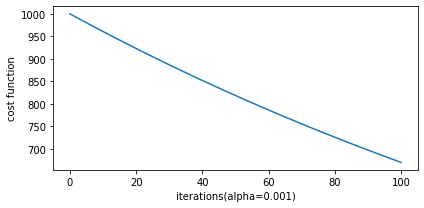

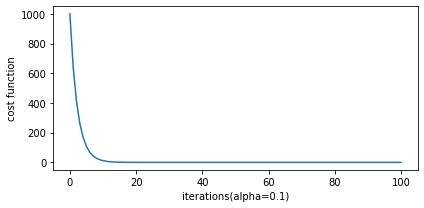

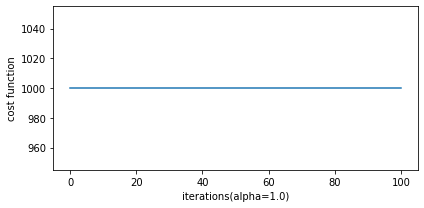

In [3]:
# import autograd functionality
import autograd.numpy as np
from autograd.util import quick_grad_check
from autograd import grad as compute_grad
from autograd.misc.flatten import flatten_func
# import custom utilities

# import various other libraries
import copy
import matplotlib.pyplot as plt

# this is needed to compensate for %matplotl+ib notebook's
# tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# gradient descent function
def gradient_descent(g, w, alpha, max_its, beta, version):
    #flatten the input function, create gradient based on flat function
    g_flat, unflatten, w = flatten_func(g, w)
    grad = compute_grad(g_flat)

    # record history
    w_hist = []
    w_hist.append(unflatten(w))

    # start gradient descent loop
    z = np.zeros((np.shape(w))) # momentum term

    # over the line
    for k in range(max_its):
        # plug in value into func and derivative
        grad_eval = grad(w)
        grad_eval.shape = np.shape(w)
        """ normalized or unnormalized descent step? """
        if version == 'normalized':
            grad_norm = np.linalg.norm(grad_eval)
            if grad_norm == 0:
                grad_norm = grad_norm + 10**-6 * np.sign(2*np.random.rand(1)-1)
                grad_eval /= grad_norm

        # take descent step with momentum
        z = beta * z + grad_eval
        w = w - alpha * z

        # record weight update
        w_hist.append(unflatten(w))

    return w_hist

# make our predict function
def predict(w):
    return np.dot(w.T, w) 

def costfunction_history(weight_history, g, alpha):
    #loop over weight history and compute associated cost function history
    cost_history = []
    for i in range(len(weight_history)):
        cost_history.append(g(weight_history[i]))
    fig, axes = plt.subplots(1, 1, figsize = (6, 3))
    axes.plot(range(len(weight_history)),cost_history)
    axes.set_xlabel("iterations"+"("+"alpha="+str(alpha)+")")
    axes.set_ylabel("cost function")
    plt.show()

if __name__ == "__main__":


    # plot contour of cost
    #demo.draw_setup(least_squares, num_contours = 7, xmax = 4,
    #				xmin = -2, ymin = 7, ymax = 12)

    # run gradient descent initialized a
    alpha = 10**-3
    max_its = 100
    w_init = 10*np.ones(10)

    # run gradient descent
    weight_history = gradient_descent(predict, w_init, alpha, max_its, beta = 0, version = "unnormalized")
    # plot cost function history
    costfunction_history(weight_history, predict, 0.001)
    
    alpha = 10**-1
    # run gradient descent
    weight_history = gradient_descent(predict, w_init, alpha, max_its, beta = 0, version = "unnormalized")
    # plot cost function history
    costfunction_history(weight_history, predict, 0.1)
    
    alpha = 1.0
    # run gradient descent
    weight_history = gradient_descent(predict, w_init, alpha, max_its, beta = 0, version = "unnormalized")
    # plot cost function history
    costfunction_history(weight_history, predict, 1.0)

According to the plots above, when we set steplength(alpha) = 0.1, the cureve has the best performance with the most fast speed to reach the minimum cost function.
When alpha = 0.001, the 1000 iterations can not bring the cost function to the minimum. Meanwhile, when alpha = 1, the curve is just a horizontal line, which means the value never changes.